# 问题类型

评价结果只有“好1”与“不好0”这两个结果，所以就是一个“二分类”问题！用sigmoid函数激活，loss函数用binary_crossentropy

In [2]:
import numpy as np
import keras

data = keras.datasets.imdb

max_word = 10000  # 最大单词数设置为10000 —— 要出现次数排名前10000的单词，丢掉生僻单词
# x是数据，y是标签
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = max_word)

Using TensorFlow backend.


In [3]:
# k-hot转换的函数：一次性对所有数据集转换
def k_hot(seqs, dim = 10000):
    result = np.zeros( (len(seqs), dim) )
    for i, seq in enumerate(seqs):
        result[i,seq] = 1
    return result

In [4]:
x_train = k_hot(x_train)
x_test = k_hot(x_test)

# 多层网络搭建

In [5]:
model = keras.Sequential()
from keras import layers

In [7]:
# 特征就是那长度为10000的向量：
model.add( layers.Dense(32, input_dim = 10000, activation = 'relu') )
model.add( layers.Dense(32, activation = 'relu') )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 323,233
Trainable params: 323,233
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']  # 因为metrics里面可以算很多东西，所以用列表
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = model.fit( x_train, y_train, epochs = 15, batch_size = 256, validation_data = (x_test, y_test) )


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 14s 575us/step - loss: 0.3744 - acc: 0.8444 - val_loss: 0.2935 - val_acc: 0.8816
Epoch 2/15
25000/25000 [==============================] - 7s 270us/step - loss: 0.1861 - acc: 0.9309 - val_loss: 0.3251 - val_acc: 0.8744
Epoch 3/15
25000/25000 [==============================] - 6s 231us/step - loss: 0.1351 - acc: 0.9513 - val_loss: 0.3797 - val_acc: 0.8679
Epoch 4/15
25000/25000 [==============================] - 6s 226us/step - loss: 0.0902 - acc: 0.9697 - val_loss: 0.4684 - val_acc: 0.8609
Epoch 5/15
25000/25000 [==============================] - 5s 210us/step - loss: 0.0513 - acc: 0.9840 - val_loss: 0.5454 - val_acc: 0.8570
Epoch 6/15
25000/25000 [==============================] - 5s 209us/step - loss: 0.0234 - acc: 0.9940 - val_loss: 0.6111 - val_acc: 0.8574
Epoch 7/15
25000/25000 [==============================] - 5s 212us/step - loss: 0.0112 - acc: 0.9972 - val_loss: 0.7467 

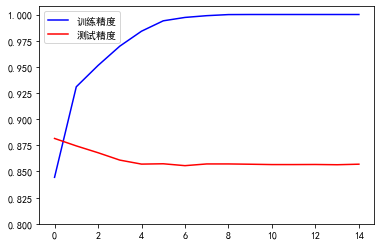

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0.8 )
plt.legend()

这过拟合非常明显！而且似乎是从第一轮往后就已经过拟合了！